# 12-Loops: Brownian Motion

Brownian motion is the random motion of particles suspended in a fluid (a liquid or a gas) resulting from their collision with other fast-moving molecules in the fluid. It is named after the botanist Robert Brown, who first observed such motion in 1827.

A random walk is similar to Brownian motion, except that the steps are taken at regular intervals. The random walk is a discrete-time Markov process in which the particle moves at each time step in a random direction with a fixed step length. The step length is usually chosen to be the lattice spacing, so that the particle can only move to an adjacent site in the lattice.

These processes are important in many fields of science and engineering. For example, the random walk is used to model the diffusion of particles, the spread of epidemics, and the price trajectory of a stock. The random walk is also used in the Monte Carlo method to simulate systems with a large number of degrees of freedom.

## Example Statement A: Random Walk
Suppose you have a one-dimensional grid of 11 points. At each time step, you move one point to the left or right with equal probability. Or in other words, you flip a coin and if you get heads, you move left, and tails you move right. If you land on the zeroeth or tenth location, you're done. What is the probability if you start at the third (3rd) location you will end up at the tenth location?

Write a program to estimate this probability. Run the program 10000 times and report (1) the average probability and (2) the average number of steps it takes to reach the end. You can also algebraically solve this problem and your answer should match your simulation.

Proficiencies and Potential Modules:
* While loops
* Nested loops (including counting and incrementing)
* If then statements
* Python lists and appending to lists
* Numpy Random module (numpy.random.choice, numpy.random.randint)
* Calculation of averages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1234)

# Set number of simulations
n_sim = 10000; count = 0; lcount = 0

# Simulate the random walks
for i in range(n_sim):
    #set up array of steps
    loc = 3; steps = [loc]
    while loc != 10 and loc != 0:
        step = np.random.randint(0,2)
        if step == 1:
            loc += 1
        else:
            loc -= 1
        steps.append(loc)
    if steps[-1] == 10:
        count += 1; lcount += len(steps)
print("Probability of reaching 10 is: ", count/n_sim)
print("Average number of steps to reach 10 is: ", lcount/count)

Probability of reaching 10 is:  0.3043
Average number of steps to reach 10 is:  30.56194544857049


## Example Statement B: Diffustion

Diffusion is important in chemical engineering and materials science. Mass transfer has specific application in the design of chemical and biological reactors, distillation columns, absorption columns and many other unit operations. Diffusion is also important in the design of drug delivery systems, in the study of transport phenomena in biological systems, and in the study of the movement of pollutants in the atmosphere.

The diffusion coefficient can be estimated from the mean squared displacement of the particle. The mean squared displacement is the average of the squared distance from the origin. The diffusion coefficient is related to the mean squared displacement by the following equation:

$$\langle r^2 \rangle = 2 d D t$$

where $d$ is the dimensionality of the system, $D$ is the diffusion coefficient, and $t$ is the time. The diffusion coefficient can be estimated by plotting the mean squared displacement as a function of time and fitting the data to a straight line. The slope of the line is equal to $2 d D$.

Using a random walk in two dimensions, estimate the diffusion coefficient of nitrogen in air. Use the following steps to arrive at your answer:
* Complete a similar setup to the above 1-D scenario, but in 2-D. Each simulation should start at the origin and the squared distance from the origin should be tracked in a list or array. For each step, either move in the x or y direction by 1 or -1. That is, first choose a direction, and then choose if the particle position increases or decreases by 1 with equal probability. The total number of movements should be at least 1000 for each simulation.
* Plot the particles movement in the x-y plane for one of the simulations. Plot the trajectory as a connection of lines with the beginning and ending points marked with a circle.
* Plot the squared distance from the origin as a function of the number of steps for one of the simulations. The squared distance from the origin is the sum of the squared x and y coordinates. The time is the number of steps taken.
* Fit the data to a straight line and calculate the slope of the line. The slope of the line is equal to $2 d D$.
* Plot the average squared distance from the origin as a function of the number of steps for 1000 simulations. The average squared distance from the origin is the average of the squared x and y coordinates. Include one other line on the plot that is the result of the fit to the data. Also include a simulation with an average less than 200 simulations. 
* Make sure plots have axis labels and legends as appropriate.
* Assume that the mean free path of nitrogen in air is 68 nanometers. Also assume that the speed of nitrogen at room temperature is 515 m/s. Calculate the effective time for each step (distance/speed). Use the effective lattice spacing (68 nm) and the step time together with the slope of the line to calculate the diffusion coefficient. Compare your result to the literature value of 0.16 $\text{cm}^2$/s.

Proficiencies and Potential Modules:
* While loops
* Nested loops (including counting and incrementing)
* If then statements
* Python lists and appending to lists
* Numpy Random module (numpy.random.choice, numpy.random.randint)
* Calculation of squared distance
* Plotting with matplotlib
* Fitting data to a straight line (numpy.polyfit)

In [2]:
nsteps = 1000; nwalks = 1000
sqdists = np.zeros((nwalks,nsteps))
for i in range(nwalks):
    #set parameters for 2-D random walk
    x = 0; y = 0 #initial x,y coordinate
    x_loc = [x]; y_loc = [y] #set up arrays for x and y coordinates
    for j in range(nsteps):
        # for each step, the x or y coordinates change by 1 or -1 depending on the random number
        if np.random.randint(0,2) == 1:
            x += np.random.choice([-1,1])
        else:
            y += np.random.choice([-1,1])
        x_loc.append(x); y_loc.append(y)
        sqdists[i,j] = (x**2 + y**2) #distance from origin

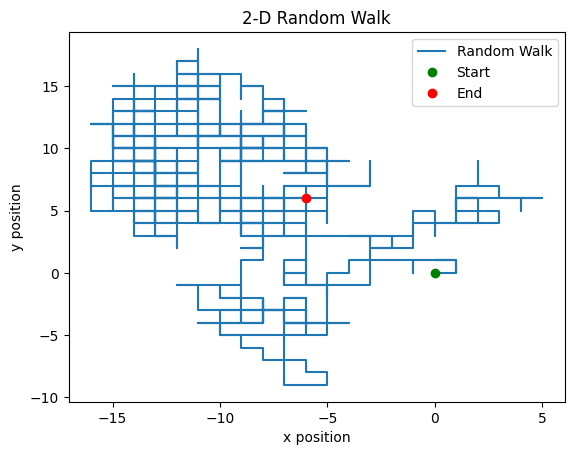

In [8]:
plt.plot(x_loc,y_loc)
plt.plot(x_loc[0],y_loc[0],'go')
plt.plot(x_loc[-1],y_loc[-1],'ro')
plt.xlabel('x position'); plt.ylabel('y position')
plt.title('2-D Random Walk')
plt.legend(['Random Walk','Start','End'])
plt.show()

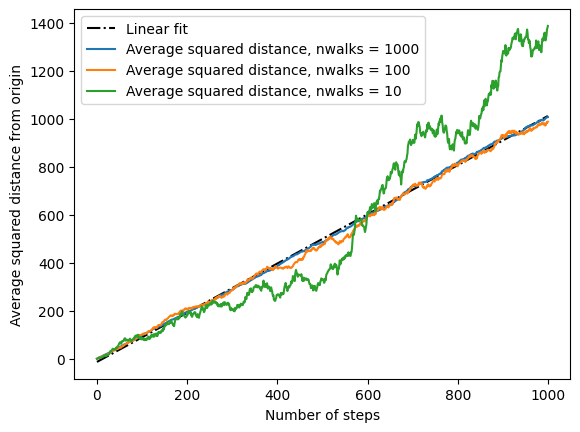

In [4]:
avesqdists = np.mean(sqdists,axis=0)
fit = np.polyfit(np.arange(nsteps),avesqdists,1)
plt.plot(fit[0]*(np.arange(nsteps))+fit[1],'k-.',label="Linear fit")
plt.plot(avesqdists,label="Average squared distance, nwalks = 1000")
plt.plot(np.mean(sqdists[:100],axis=0),label="Average squared distance, nwalks = 100")
plt.plot(np.mean(sqdists[:10],axis=0),label="Average squared distance, nwalks = 10")
plt.legend()
plt.xlabel("Number of steps"); plt.ylabel("Average squared distance from origin")
plt.show()

In [5]:
mfp = 69e-9 #mean free path in meters
speed_n2 = np.sqrt(3*8.314*298/0.028) #speed of N2 in m/s
timeperstep = mfp/speed_n2 #time per step in seconds
print(f'The mean free path is {mfp*1e9:.2f} nm at 298 K. At that temperature, the speed of N2 is {speed_n2:.2f} m/s. The time per step is {timeperstep*1e12:.2f} ps.')

The mean free path is 69.00 nm at 298 K. At that temperature, the speed of N2 is 515.22 m/s. The time per step is 133.92 ps.


In [6]:
DiffCoef = fit[0]*(mfp**2)/timeperstep/4
print(f'The estimated diffusion coefficient is {DiffCoef*1e4:.2f} cm^2/s.')

The estimated diffusion coefficient is 0.09 cm^2/s.


The diffusion coefficient of nitrogen in air at 298 is near 0.2 $\text{cm}^2$ /s. The above estimate of the diffusion coefficient is close to this value.